┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

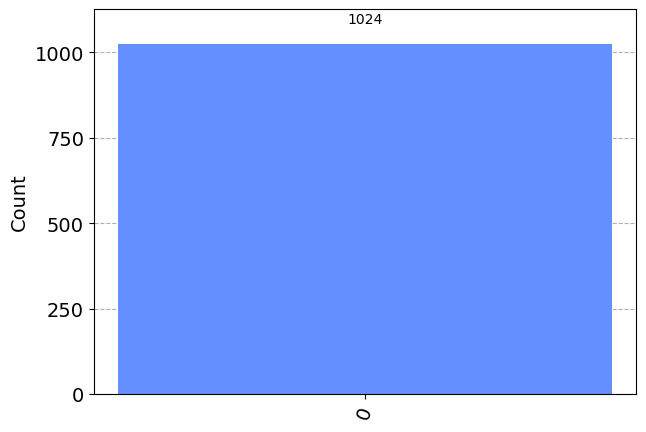

In [29]:
from qiskit import QuantumCircuit, Aer, transpile 
from qiskit.visualization import plot_histogram, plot_bloch_multivector 
from numpy.random import randint 
import numpy as np 

#if alice prepares a qubit in the state |+>(0 in the X-basis), and bob measures it in the X-basis
#, Bob is sure to measure 0: 

qc = QuantumCircuit(1,1)
#Alice prepare qubit is state |+> 
qc.h(0)
qc.barrier()
#Alice now sends the qubit to Bob who measures it in the X-basis 
qc.h(0)
qc.measure(0,0)

#Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc)
plot_histogram(job.result().get_counts())

┌───┐┌─┐ ░ ┌───┐┌─┐
  q: ┤ H ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

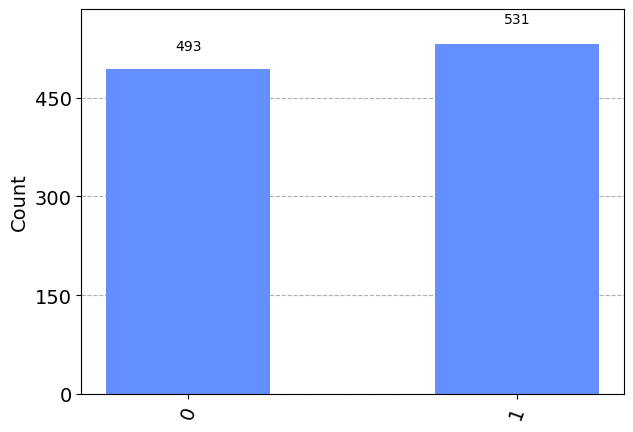

In [30]:
#But if Eve tries to measure this qubit in the Z-basis before it reaches Bob, she will change the 
#qubit's state from |+> to either |0> or |1>, and bob is no longer certain to measure 0: 

qc = QuantumCircuit(1,1)
#Alice prepares qubit in state |+>
qc.h(0)
#alice now send the qubit to bob but Eve intercept and tries to read it 
qc.measure(0, 0)
qc.barrier()
#Eve then passes this on to Bob who measures it in the X-basis
qc.h(0)
qc.measure(0,0)
#Draw and simulate circuit 
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc)
plot_histogram(job.result().get_counts())

In [31]:
#To generate pseudo-random keys, we will use the randint fucntion from numpy
#To make sure you can reproduce the reults on this page, we will set the seed to 0:
np.random.seed(seed=0)

#We will call the length of Aliuce's initial message n. In this example, 
#Allice will send the message 100 qubits long:
n = 100 

#step1: alice generates her random set of bits. 
alice_bits = randint(2, size=n)
print(alice_bits)



[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


In [32]:
#the function encode_message below, creates a list of QuantumCircuit
#each representing a single qubit in Alice's message
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # prepare qubit in Z-basis
            if bits[i] == 0:
                pass
            else: 
                qc.x(0)
        else: # prepare qubit in X-basis 
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

In [33]:
np.random.seed(seed=0)
n=100 

#step1: alice generates bits 
alice_bits = randint(2, size=n)
#Step2: create an array to tell us which qubits are encoded in which bases. 
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

#We can see that thie first bit in alice_bits is 0, and the basis the encode this in 
#is the X-basis(represented by 1):
print('bit = %i' %alice_bits[0])
print('basis = %i' %alice_bases[0])

bit = 0
basis = 1


In [34]:
#if we view the first circuit in message(representing the first qubit in Alice's message), 
#we can verify that Allice has prepared a qubit in the state |+>
message[0].draw()

┌───┐ ░ 
  q: ┤ H ├─░─
     └───┘ ░ 
c: 1/════════

In [35]:
#as another example, we can see that the fourth bit in alice_bits is 1, and it is encoded
#in the Z-basis, Alice prepares the corresponding qubit in the state|1>
print('bit = %i' %alice_bits[4])
print('basis = %i'%alice_bases[4])
message[4].draw()

bit = 1
basis = 0


┌───┐ ░ 
  q: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════

In [36]:
#3.3 step 3 
# Bob then measures each qubit in the X or Z-bsis at random and stores this information. 
#decide which basis to measure in:
bob_bases = randint(2, size=n)
print(bob_bases)

[1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]


In [37]:
#below, the fucntion measure_message applies the corresponding measurement and simulates
#the result of measuring each qubit. We store the measurement results in bob_results. 

def measure_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: #measureing in Z-basis.
            message[q].measure(0,0)
        if bases[q] == 1: #measurinig in X-basis.
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        result = aer_sim.run(message[q], shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [38]:
#step3 
#decide which basis to measure in: 
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

In [39]:
#we can see that the circuit in message[0](representing the 0th qubit) has had an X-measuremen
#added to it by Bob:
message[0].draw()

┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

In [40]:
#since bob has by chance chosen to measure in the same basis Alice encoded the qubit in, Bob is 
#gruranteed to get the rsult 0. For the 6th qubit(show below). Bob's random choice of measurment
# is not the same sa Alice's and Bob's result has only a 50% chance of mattching Alices
message[6].draw()
print(bob_results)

[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1]


In [41]:
#Step4:after this, alice reveals(through Eve's channel) which qubits were encode in which basis: 
#and bob reveal which basis he measured each qubit in : 
# if bob happened to measure a bit in the same basis Alice prepared it in
#this means the entry in bob_resilts will match the corresponding enty in alice_bits
#and they can use that bit as part of their key. if they measured in different bases
#bob's result is random, and they both throw that entry away.Here is a function remove_garbage 
#that does this for us:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            #if both used the same basis, add this to the list of good bits. 
            good_bits.append(bits[q])
    return good_bits

In [42]:
#step4:
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print("alice:", alice_key)
print("bob:", bob_key)


alice: [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1]
bob: [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1]


In [43]:
#Step5:finally, bob and alice compare a random selection of the bits in their keys to make sure 
#the protocol has worked correctly
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        #use np.mod to make sure the bit we sample is always in the list range
        i = np.mod(i, len(bits))
        #pop(i) removes the elements of the list at index 'i'
        sample.append(bits.pop(i))
    return sample 

In [44]:
#step5:Alice and Bob both broadcast these publicly, and remove them from their keys 
#as they are no longer secret:


sample_size = 15 
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("bob_sample= " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

bob_sample= [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1]
alice_sample = [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1]


In [45]:
#if the protocol has worked correctly without intergerece, their samples should match:
bob_sample == alice_sample 
print(bob_key)
print(alice_key)
print("key length = %i" % len(alice_key))

[1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
key length = 32


In [46]:
#QISKIT EXAMPLE: WITH Interception 
#lets now see how Alice and Bob can tell if Eve has been trying to listen in on their QM
#We repeat the same step as without interference, but before bob receives his qubits, Eve will 
#try and extract some information from them. Let's set a different seed so we get a specific 
#set of reproducible 'random' result:
np.random.seed(seed=3)
#step1: Alice generates her set of random bits:L
alice_bits = randint(2, size=n)
print(alice_bits)

[0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1
 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1]


In [47]:
#step2:Alice encodes these in the Z and X-bases at random, and sends these to bob through
#quantum Eve's quantum channel. 
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)
print(alice_bases)

[1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1]


In [48]:
#first qubit in Alice's message is in the state |+>
message[0].draw()

┌───┐ ░ 
  q: ┤ H ├─░─
     └───┘ ░ 
c: 1/════════

In [49]:
#Interception!: Eve intercepts the message as it passes through her channel.She tries to measure
#the qubits in a random selection of bases, in the same way bob will later
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
print(intercepted_message)

[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0]


In [50]:
#We can see the case of qubit 0 below;Eve's random choice of basis is not the same as Alice's
# and this will change the qubit state frokm |+>, to a random state in the Z-basis, with 50% 
#probability of |0> or |1>:
message[0].draw()

┌───┐ ░ ┌─┐
  q: ┤ H ├─░─┤M├
     └───┘ ░ └╥┘
c: 1/═════════╩═
              0

In [51]:
#step3:Eve then passes on the qubits to bob who measure them at random.In this case,bob chose
#(by chance) to measure in the same basis Alice prepared in the qubit in. Without interception
#bob would be guaranteed to measure 0, but because Eve tried to read the message he now has a 
#50 chance of measuring 1 instead. 
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
message[0].draw()

┌───┐ ░ ┌─┐┌───┐┌─┐
  q: ┤ H ├─░─┤M├┤ H ├┤M├
     └───┘ ░ └╥┘└───┘└╥┘
c: 1/═════════╩═══════╩═
              0       0

In [52]:
#step4: Bob and alice reveal their basis choices, and discard the useless bits: 
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_ley = remove_garbage(alice_bases, bob_bases, alice_bits)


In [53]:
#step5:bob and alice compare the same random selection of their keys to see if the qubits were intercept. 
## Step 5
sample_size = 15
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
alice_sample = [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]


In [54]:
bob_sample == alice_sample

False

In [55]:
#no!, bob's key and alice's key do not match. we know this is because Eve tried to read the message 
#between step 2 and 3, and changed the qubit's states. for all alice and bob know, this could be 
#due to noise in the cahnnel, but either way they msut throw away all their result and try again
#Eve's interception attempt has failed. 

In [56]:
#5: Risk Analysis 
n = 100
# Step 1
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
# Step 2
message = encode_message(alice_bits, alice_bases)
# Interception!
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
# Step 3
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)
# Step 4
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
# Step 5
sample_size = 15 # Change this to something lower and see if 
                 # Eve can intercept the message without Alice
                 # and Bob finding out
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
alice_sample = sample_bits(alice_key, bit_selection)

if bob_sample != alice_sample:
    print("Eve's interference was detected.")
else:
    print("Eve went undetected!")

Eve's interference was detected.
